# Подготовка тренировочных данных

In [16]:
import sklearn
import pandas as pd
import numpy as np

In [24]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
#графики в svg выглядят более четкими
%config InlineBackend.figure_format = 'svg' 

In [2]:
pd.options.display.float_format ='{:,.3f}'.format
train_data = pd.read_csv('data/train.csv')
train_data

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
0,Own Home,"482,087.000",NaN,0.000,11.000,26.300,"685,960.000",1.000,NaN,1.000,debt consolidation,Short Term,"99,999,999.000","47,386.000","7,914.000",749.000,0
1,Own Home,"1,025,487.000",10+ years,0.000,15.000,15.300,"1,181,730.000",0.000,NaN,0.000,debt consolidation,Long Term,"264,968.000","394,972.000","18,373.000",737.000,1
2,Home Mortgage,"751,412.000",8 years,0.000,11.000,35.000,"1,182,434.000",0.000,NaN,0.000,debt consolidation,Short Term,"99,999,999.000","308,389.000","13,651.000",742.000,0
3,Own Home,"805,068.000",6 years,0.000,8.000,22.500,"147,400.000",1.000,NaN,1.000,debt consolidation,Short Term,"121,396.000","95,855.000","11,338.000",694.000,0
4,Rent,"776,264.000",8 years,0.000,13.000,13.600,"385,836.000",1.000,NaN,0.000,debt consolidation,Short Term,"125,840.000","93,309.000","7,180.000",719.000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,Rent,"402,192.000",< 1 year,0.000,3.000,8.500,"107,866.000",0.000,NaN,0.000,other,Short Term,"129,360.000","73,492.000","1,900.000",697.000,0
7496,Home Mortgage,"1,533,984.000",1 year,0.000,10.000,26.500,"686,312.000",0.000,43.000,0.000,debt consolidation,Long Term,"444,048.000","456,399.000","12,783.000","7,410.000",1
7497,Rent,"1,878,910.000",6 years,0.000,12.000,32.100,"1,778,920.000",0.000,NaN,0.000,buy a car,Short Term,"99,999,999.000","477,812.000","12,479.000",748.000,0
7498,Home Mortgage,NaN,NaN,0.000,21.000,26.500,"1,141,250.000",0.000,NaN,0.000,debt consolidation,Short Term,"615,274.000","476,064.000","37,118.000",NaN,0


In [145]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Home Ownership                7500 non-null   object 
 1   Annual Income                 5943 non-null   float64
 2   Years in current job          7129 non-null   object 
 3   Tax Liens                     7500 non-null   float64
 4   Number of Open Accounts       7500 non-null   float64
 5   Years of Credit History       7500 non-null   float64
 6   Maximum Open Credit           7500 non-null   float64
 7   Number of Credit Problems     7500 non-null   float64
 8   Months since last delinquent  3419 non-null   float64
 9   Bankruptcies                  7486 non-null   float64
 10  Purpose                       7500 non-null   object 
 11  Term                          7500 non-null   object 
 12  Current Loan Amount           7500 non-null   float64
 13  Cur

In [163]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Home Ownership                2500 non-null   object 
 1   Annual Income                 1987 non-null   float64
 2   Years in current job          2414 non-null   object 
 3   Tax Liens                     2500 non-null   float64
 4   Number of Open Accounts       2500 non-null   float64
 5   Years of Credit History       2500 non-null   float64
 6   Maximum Open Credit           2500 non-null   float64
 7   Number of Credit Problems     2500 non-null   float64
 8   Months since last delinquent  1142 non-null   float64
 9   Bankruptcies                  2497 non-null   float64
 10  Purpose                       2500 non-null   object 
 11  Term                          2500 non-null   object 
 12  Current Loan Amount           2500 non-null   float64
 13  Cur

In [23]:
train_data.describe()

,Annual Income,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
count,"5,943.000","7,500.000","7,500.000","7,500.000","7,500.000","7,500.000","3,419.000","7,486.000","7,500.000","7,500.000","7,500.000","5,943.000","7,500.000"
mean,"1,366,391.720",0.030,11.131,18.317,"945,153.727",0.170,34.693,0.117,"11,873,177.445","289,833.235","18,314.454","1,151.087",0.282
std,"845,339.200",0.272,4.909,7.042,"16,026,216.671",0.499,21.689,0.347,"31,926,122.975","317,871.382","11,926.765","1,604.451",0.450
min,"164,597.000",0.000,2.000,4.000,0.000,0.000,0.000,0.000,"11,242.000",0.000,0.000,585.000,0.000
25%,"844,341.000",0.000,8.000,13.500,"279,229.500",0.000,16.000,0.000,"180,169.000","114,256.500","10,067.500",711.000,0.000
50%,"1,168,386.000",0.000,10.000,17.000,"478,159.000",0.000,32.000,0.000,"309,573.000","209,323.000","16,076.500",731.000,0.000
75%,"1,640,137.000",0.000,14.000,21.800,"793,501.500",0.000,50.000,0.000,"519,882.000","360,406.250","23,818.000",743.000,1.000
max,"10,149,344.000",7.000,43.000,57.700,"1,304,726,170.000",7.000,118.000,4.000,"99,999,999.000","6,506,797.000","136,679.000","7,510.000",1.000


In [20]:
train_data.describe(include=['object', 'bool'])

,Home Ownership,Years in current job,Purpose,Term
count,7500,7129,7500,7500
unique,4,11,15,2
top,Home Mortgage,10+ years,debt consolidation,Short Term
freq,3637,2332,5944,5556


In [6]:
train_data['Credit Default'].value_counts()

0    5387
1    2113
Name: Credit Default, dtype: int64

In [156]:
train_data.corr()

,Annual Income,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
Annual Income,1.000,0.066,0.189,0.187,0.062,-0.015,-0.102,-0.067,0.032,0.386,0.585,-0.038,-0.101
Tax Liens,0.066,1.000,-0.005,0.009,-0.002,0.595,0.052,0.057,-0.008,-0.010,0.027,0.011,0.024
Number of Open Accounts,0.189,-0.005,1.000,0.145,0.024,-0.018,-0.033,-0.019,0.001,0.267,0.414,0.016,0.029
Years of Credit History,0.187,0.009,0.145,1.000,0.029,0.071,-0.015,0.086,0.011,0.218,0.192,-0.016,-0.021
Maximum Open Credit,0.062,-0.002,0.024,0.029,1.000,-0.005,-0.004,-0.012,-0.002,0.088,0.010,-0.009,-0.014
Number of Credit Problems,-0.015,0.595,-0.018,0.071,-0.005,1.000,0.140,0.731,-0.009,-0.124,-0.042,-0.018,0.020
Months since last delinquent,-0.102,0.052,-0.033,-0.015,-0.004,0.140,1.000,0.163,0.000,-0.027,-0.058,-0.004,0.003
Bankruptcies,-0.067,0.057,-0.019,0.086,-0.012,0.731,0.163,1.000,-0.006,-0.143,-0.080,-0.027,0.002
Current Loan Amount,0.032,-0.008,0.001,0.011,-0.002,-0.009,0.000,-0.006,1.000,0.017,-0.009,-0.109,-0.227
Current Credit Balance,0.386,-0.010,0.267,0.218,0.088,-0.124,-0.027,-0.143,0.017,1.000,0.505,-0.006,-0.020


In [ ]:
#from pandas.plotting import scatter_matrix
pd.plotting.scatter_matrix(train_data)

array([[<AxesSubplot:xlabel='Annual Income', ylabel='Annual Income'>,
        <AxesSubplot:xlabel='Tax Liens', ylabel='Annual Income'>,
        <AxesSubplot:xlabel='Number of Open Accounts', ylabel='Annual Income'>,
        <AxesSubplot:xlabel='Years of Credit History', ylabel='Annual Income'>,
        <AxesSubplot:xlabel='Maximum Open Credit', ylabel='Annual Income'>,
        <AxesSubplot:xlabel='Number of Credit Problems', ylabel='Annual Income'>,
        <AxesSubplot:xlabel='Months since last delinquent', ylabel='Annual Income'>,
        <AxesSubplot:xlabel='Bankruptcies', ylabel='Annual Income'>,
        <AxesSubplot:xlabel='Current Loan Amount', ylabel='Annual Income'>,
        <AxesSubplot:xlabel='Current Credit Balance', ylabel='Annual Income'>,
        <AxesSubplot:xlabel='Monthly Debt', ylabel='Annual Income'>,
        <AxesSubplot:xlabel='Credit Score', ylabel='Annual Income'>,
        <AxesSubplot:xlabel='Credit Default', ylabel='Annual Income'>],
       [<AxesSubplot:xlabel

<AxesSubplot:>

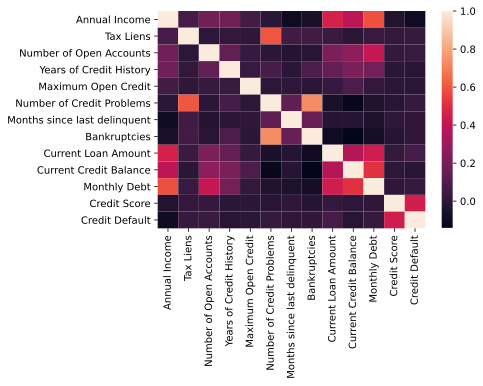

In [66]:
sns.heatmap(train_data.corr())

<AxesSubplot:>

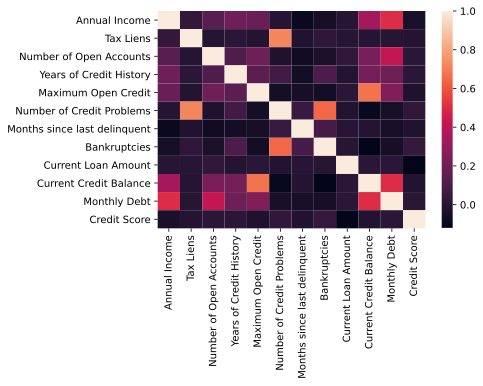

In [67]:
sns.heatmap(test_data.corr())

## Home Ownership

In [12]:
train_data['Home Ownership'].value_counts()

Home Mortgage    3637
Rent             3204
Own Home          647
Have Mortgage      12
Name: Home Ownership, dtype: int64

In [120]:
pd.crosstab(train_data['Home Ownership'], train_data['Credit Default'], normalize=False)

Credit Default,0,1
Home Ownership,,
Have Mortgage,10,2
Home Mortgage,2721,916
Own Home,455,192
Rent,2201,1003


Закодируем 'Home Ownership' 

In [71]:
train_data_prepared = pd.get_dummies(train_data, prefix=['ho_'], columns = ['Home Ownership'], drop_first=False)
train_data_prepared

,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default,ho__Have Mortgage,ho__Home Mortgage,ho__Own Home,ho__Rent
0,"482,087.000",NaN,0.000,11.000,26.300,"685,960.000",1.000,NaN,1.000,debt consolidation,Short Term,"99,999,999.000","47,386.000","7,914.000",749.000,0,0,0,1,0
1,"1,025,487.000",10+ years,0.000,15.000,15.300,"1,181,730.000",0.000,NaN,0.000,debt consolidation,Long Term,"264,968.000","394,972.000","18,373.000",737.000,1,0,0,1,0
2,"751,412.000",8 years,0.000,11.000,35.000,"1,182,434.000",0.000,NaN,0.000,debt consolidation,Short Term,"99,999,999.000","308,389.000","13,651.000",742.000,0,0,1,0,0
3,"805,068.000",6 years,0.000,8.000,22.500,"147,400.000",1.000,NaN,1.000,debt consolidation,Short Term,"121,396.000","95,855.000","11,338.000",694.000,0,0,0,1,0
4,"776,264.000",8 years,0.000,13.000,13.600,"385,836.000",1.000,NaN,0.000,debt consolidation,Short Term,"125,840.000","93,309.000","7,180.000",719.000,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,"402,192.000",< 1 year,0.000,3.000,8.500,"107,866.000",0.000,NaN,0.000,other,Short Term,"129,360.000","73,492.000","1,900.000",697.000,0,0,0,0,1
7496,"1,533,984.000",1 year,0.000,10.000,26.500,"686,312.000",0.000,43.000,0.000,debt consolidation,Long Term,"444,048.000","456,399.000","12,783.000","7,410.000",1,0,1,0,0
7497,"1,878,910.000",6 years,0.000,12.000,32.100,"1,778,920.000",0.000,NaN,0.000,buy a car,Short Term,"99,999,999.000","477,812.000","12,479.000",748.000,0,0,0,0,1
7498,NaN,NaN,0.000,21.000,26.500,"1,141,250.000",0.000,NaN,0.000,debt consolidation,Short Term,"615,274.000","476,064.000","37,118.000",NaN,0,0,1,0,0


## Annual Income (Годовой доход)

Annual Income - годовой доход, не коррелирует с другими параметрами. 

In [74]:
train_data['Annual Income'].describe()

count        5,943.000
mean     1,366,391.720
std        845,339.200
min        164,597.000
25%        844,341.000
50%      1,168,386.000
75%      1,640,137.000
max     10,149,344.000
Name: Annual Income, dtype: float64

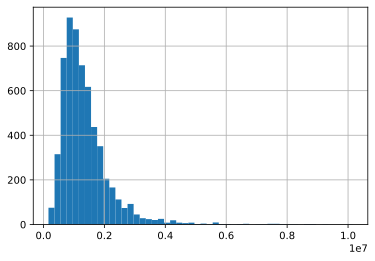

In [76]:
fig = train_data['Annual Income'].hist(bins=50).get_figure()

In [103]:
train_data_prepared['Annual Income'] = train_data['Annual Income'].fillna(train_data['Annual Income'].median())['Annual Income'] = train_data['Annual Income'].fillna(train_data['Annual Income'].median())

In [104]:
train_data_prepared['Annual Income'].describe()

count        7,500.000
mean     1,325,285.733
std        756,755.138
min        164,597.000
25%        931,133.000
50%      1,168,386.000
75%      1,499,974.000
max     10,149,344.000
Name: Annual Income, dtype: float64

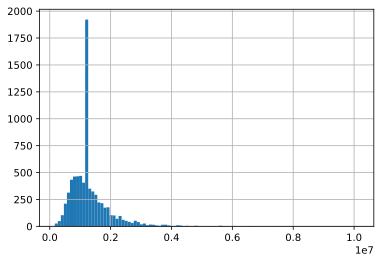

In [105]:
fig = train_data_prepared['Annual Income'].hist(bins=100).get_figure()

<AxesSubplot:>

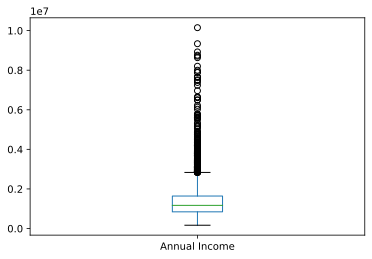

In [85]:
train_data_prepared['Annual Income'].plot(kind='box')

## Years in current job

<AxesSubplot:xlabel='Years in current job'>

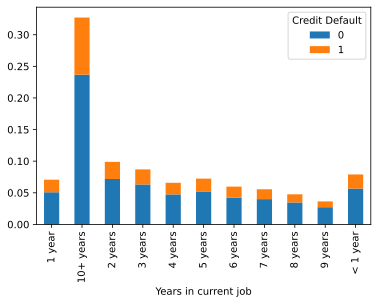

In [143]:
pd.crosstab(train_data['Years in current job'], train_data['Credit Default'], dropna=False, normalize=True).plot(kind='bar', stacked=True)

Особо не влияет на таргет. К тому же любой человек мог поменять работу недавно.
Нан может означать отсутствие данных либо человек вообще без работы.

<AxesSubplot:xlabel='Years in current job'>

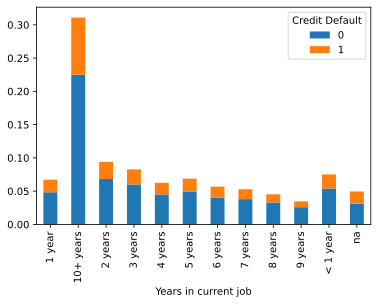

In [148]:
pd.crosstab(train_data['Years in current job'].fillna('na'), train_data['Credit Default'], dropna=False, normalize=True).plot(kind='bar', stacked=True)

In [ ]:
Распределение отличается от остальных, значит можно предположить. Что человек безработный. Установим значение 0. 
Значения меньше одного года установим в 0.5

In [56]:
train_data['Years in current job'].value_counts()

10+ years    2332
2 years       705
3 years       620
< 1 year      563
5 years       516
1 year        504
4 years       469
6 years       426
7 years       396
8 years       339
9 years       259
Name: Years in current job, dtype: int64

In [154]:
transform_dict = {'< 1 year':0.5, '10+ years':10, '2 years':2, '3 years':3, '5 years':5, '1 year':1, '4 years':4, '6 years':6, '7 years':7, '8 years':8, '9 years':9}

train_data_prepared['Years in current job'] = train_data['Years in current job'].replace(transform_dict, None)
train_data_prepared['Years in current job'] = train_data_prepared['Years in current job'].fillna(0)

<AxesSubplot:xlabel='Years in current job'>

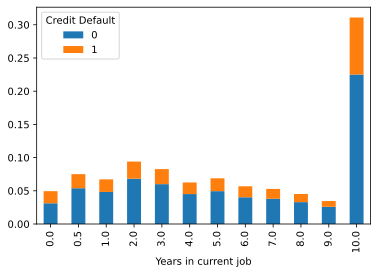

In [155]:
pd.crosstab(train_data_prepared['Years in current job'], train_data_prepared['Credit Default'], normalize=True).plot(kind='bar', stacked=True)

## Tax Liens (Залог, количество)

Слабо коррелирует с (Number of Credit Problems - количество проблем с кредитом)

In [159]:
train_data['Tax Liens'].describe()

count   7,500.000
mean        0.030
std         0.272
min         0.000
25%         0.000
50%         0.000
75%         0.000
max         7.000
Name: Tax Liens, dtype: float64

<AxesSubplot:xlabel='Tax Liens'>

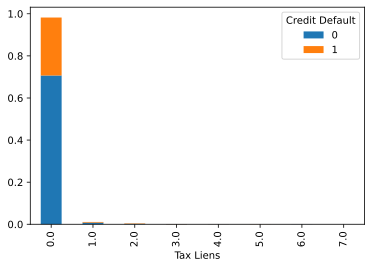

In [160]:
pd.crosstab(train_data['Tax Liens'], train_data['Credit Default'], dropna=False, normalize=True).plot(kind='bar', stacked=True)

Возможно можно удалить.

## Number of Open Accounts (Количество открытых счетов)

In [161]:
train_data['Number of Open Accounts'].describe()

count   7,500.000
mean       11.131
std         4.909
min         2.000
25%         8.000
50%        10.000
75%        14.000
max        43.000
Name: Number of Open Accounts, dtype: float64

<AxesSubplot:xlabel='Number of Open Accounts'>

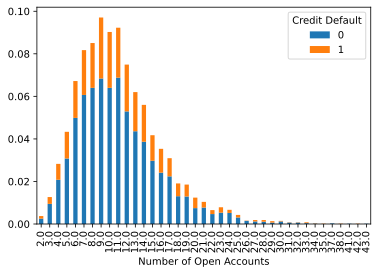

In [162]:
pd.crosstab(train_data['Number of Open Accounts'], train_data['Credit Default'], dropna=False, normalize=True).plot(kind='bar', stacked=True)

## Years of Credit History (Количество лет кредитной истории)

In [164]:
train_data['Years of Credit History'].describe()

count   7,500.000
mean       18.317
std         7.042
min         4.000
25%        13.500
50%        17.000
75%        21.800
max        57.700
Name: Years of Credit History, dtype: float64

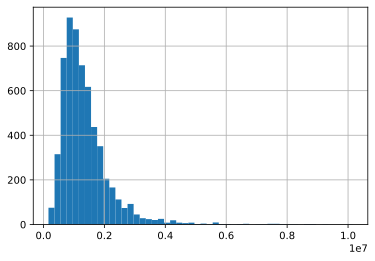

In [166]:
fig = train_data['Annual Income'].hist(bins=50).get_figure()

## Maximum Open Credit (Наибольший открытый кредит)

In [167]:
train_data['Maximum Open Credit'].describe()

count           7,500.000
mean          945,153.727
std        16,026,216.671
min                 0.000
25%           279,229.500
50%           478,159.000
75%           793,501.500
max     1,304,726,170.000
Name: Maximum Open Credit, dtype: float64

In [170]:
train_data['Maximum Open Credit'].value_counts()

0.000            65
319,110.000       5
334,796.000       3
358,732.000       3
323,312.000       3
                 ..
235,642.000       1
1,435,456.000     1
397,078.000       1
537,680.000       1
1,516,482.000     1
Name: Maximum Open Credit, Length: 6963, dtype: int64

## Number of Credit Problems (Количество проблем с кредитом)

In [173]:
train_data['Number of Credit Problems'].describe()

count   7,500.000
mean        0.170
std         0.499
min         0.000
25%         0.000
50%         0.000
75%         0.000
max         7.000
Name: Number of Credit Problems, dtype: float64

<AxesSubplot:xlabel='Number of Credit Problems'>

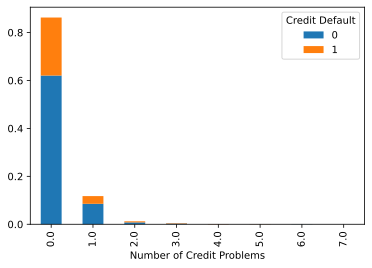

In [174]:
pd.crosstab(train_data['Number of Credit Problems'], train_data['Credit Default'], dropna=False, normalize=True).plot(kind='bar', stacked=True)

Коррелирует с (Bankruptcies - банкротства) и слабо коррелирует с (Tax Liens - залог)
Возможно необходимо сделать (есть - нет)

## Months since last delinquent (Количество месяцев с последней просрочки платежа)

In [77]:
train_data['Months since last delinquent'].describe()

count   3,419.000
mean       34.693
std        21.689
min         0.000
25%        16.000
50%        32.000
75%        50.000
max       118.000
Name: Months since last delinquent, dtype: float64

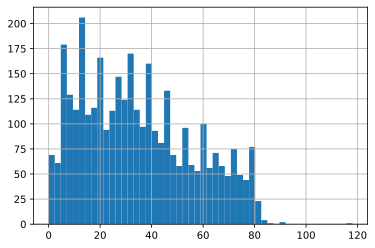

In [78]:
fig = train_data['Months since last delinquent'].hist(bins=50).get_figure()

In [79]:
train_data_prepared['Months since last delinquent'] = train_data['Months since last delinquent'].fillna(500)

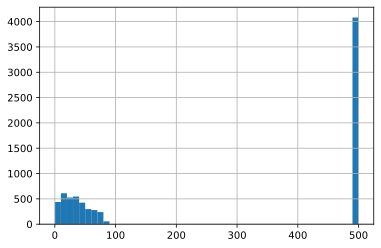

In [80]:
fig = train_data_prepared['Months since last delinquent'].hist(bins=50).get_figure()

<AxesSubplot:xlabel='Months since last delinquent'>

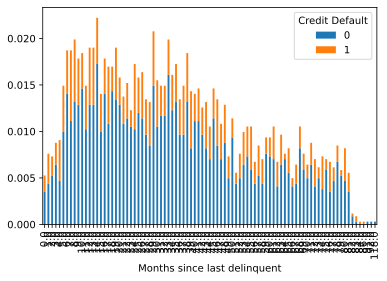

In [82]:
pd.crosstab(train_data['Months since last delinquent'], train_data['Credit Default'], dropna=False, normalize=True).plot(kind='bar', stacked=True)

Самый сложный параметр. Без него пока.

## Bankruptcies (Банкротства)

In [181]:
train_data['Bankruptcies'].describe()

count   7,486.000
mean        0.117
std         0.347
min         0.000
25%         0.000
50%         0.000
75%         0.000
max         4.000
Name: Bankruptcies, dtype: float64

<AxesSubplot:xlabel='Bankruptcies'>

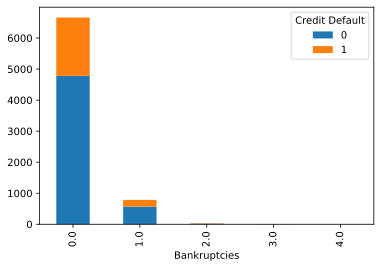

In [186]:
pd.crosstab(train_data['Bankruptcies'], train_data['Credit Default'], dropna=False, normalize=False).plot(kind='bar', stacked=True)

Возможно необходимо сделать (есть - нет)

Хорошо коррелирует с Number of Credit Problems (Количество проблем с кредитом). Заполним недостающие значения. Опираясь на данные этого парраметра. Если 0 - ставим 0. Иначе 1.


In [191]:
train_data_prepared['Bankruptcies'] = train_data_prepared['Bankruptcies'].fillna(train_data_prepared['Number of Credit Problems'].apply(lambda x: 0 if (x == 0) else 1)) 

In [192]:
train_data_prepared['Bankruptcies'].describe()

count   7,500.000
mean        0.117
std         0.347
min         0.000
25%         0.000
50%         0.000
75%         0.000
max         4.000
Name: Bankruptcies, dtype: float64

## Purpose (Цель кредита)

In [194]:
train_data['Purpose'].describe()

count                   7500
unique                    15
top       debt consolidation
freq                    5944
Name: Purpose, dtype: object

<AxesSubplot:xlabel='Purpose'>

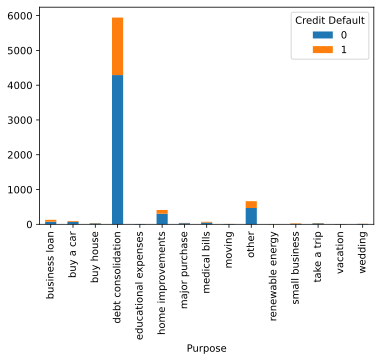

In [196]:
pd.crosstab(train_data['Purpose'], train_data['Credit Default'], dropna=False, normalize=False).plot(kind='bar', stacked=True)

In [195]:
train_data_prepared = pd.get_dummies(train_data, prefix=['p_'], columns = ['Purpose'], drop_first=False)
train_data_prepared

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,...,p__home improvements,p__major purchase,p__medical bills,p__moving,p__other,p__renewable energy,p__small business,p__take a trip,p__vacation,p__wedding
0,Own Home,"482,087.000",NaN,0.000,11.000,26.300,"685,960.000",1.000,NaN,1.000,...,0,0,0,0,0,0,0,0,0,0
1,Own Home,"1,025,487.000",10+ years,0.000,15.000,15.300,"1,181,730.000",0.000,NaN,0.000,...,0,0,0,0,0,0,0,0,0,0
2,Home Mortgage,"751,412.000",8 years,0.000,11.000,35.000,"1,182,434.000",0.000,NaN,0.000,...,0,0,0,0,0,0,0,0,0,0
3,Own Home,"805,068.000",6 years,0.000,8.000,22.500,"147,400.000",1.000,NaN,1.000,...,0,0,0,0,0,0,0,0,0,0
4,Rent,"776,264.000",8 years,0.000,13.000,13.600,"385,836.000",1.000,NaN,0.000,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,Rent,"402,192.000",< 1 year,0.000,3.000,8.500,"107,866.000",0.000,NaN,0.000,...,0,0,0,0,1,0,0,0,0,0
7496,Home Mortgage,"1,533,984.000",1 year,0.000,10.000,26.500,"686,312.000",0.000,43.000,0.000,...,0,0,0,0,0,0,0,0,0,0
7497,Rent,"1,878,910.000",6 years,0.000,12.000,32.100,"1,778,920.000",0.000,NaN,0.000,...,0,0,0,0,0,0,0,0,0,0
7498,Home Mortgage,NaN,NaN,0.000,21.000,26.500,"1,141,250.000",0.000,NaN,0.000,...,0,0,0,0,0,0,0,0,0,0


## Term (Cрок кредита)

In [3]:
train_data['Term'].describe()

count           7500
unique             2
top       Short Term
freq            5556
Name: Term, dtype: object

<AxesSubplot:xlabel='Term'>

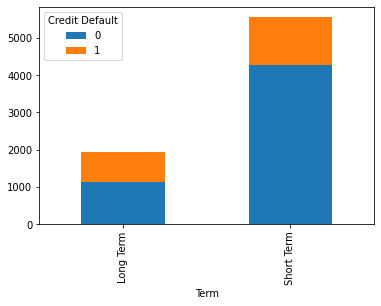

In [4]:
pd.crosstab(train_data['Term'], train_data['Credit Default'], dropna=False, normalize=False).plot(kind='bar', stacked=True)

In [6]:
transform_dict = {'Long Term':0, 'Short Term':1}

train_data_prepared['Term'] = train_data['Term'].replace(transform_dict, None)
train_data_prepared

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default,t__Long Term,t__Short Term,Term
0,Own Home,"482,087.000",NaN,0.000,11.000,26.300,"685,960.000",1.000,NaN,1.000,debt consolidation,"99,999,999.000","47,386.000","7,914.000",749.000,0,0,1,1
1,Own Home,"1,025,487.000",10+ years,0.000,15.000,15.300,"1,181,730.000",0.000,NaN,0.000,debt consolidation,"264,968.000","394,972.000","18,373.000",737.000,1,1,0,0
2,Home Mortgage,"751,412.000",8 years,0.000,11.000,35.000,"1,182,434.000",0.000,NaN,0.000,debt consolidation,"99,999,999.000","308,389.000","13,651.000",742.000,0,0,1,1
3,Own Home,"805,068.000",6 years,0.000,8.000,22.500,"147,400.000",1.000,NaN,1.000,debt consolidation,"121,396.000","95,855.000","11,338.000",694.000,0,0,1,1
4,Rent,"776,264.000",8 years,0.000,13.000,13.600,"385,836.000",1.000,NaN,0.000,debt consolidation,"125,840.000","93,309.000","7,180.000",719.000,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,Rent,"402,192.000",< 1 year,0.000,3.000,8.500,"107,866.000",0.000,NaN,0.000,other,"129,360.000","73,492.000","1,900.000",697.000,0,0,1,1
7496,Home Mortgage,"1,533,984.000",1 year,0.000,10.000,26.500,"686,312.000",0.000,43.000,0.000,debt consolidation,"444,048.000","456,399.000","12,783.000","7,410.000",1,1,0,0
7497,Rent,"1,878,910.000",6 years,0.000,12.000,32.100,"1,778,920.000",0.000,NaN,0.000,buy a car,"99,999,999.000","477,812.000","12,479.000",748.000,0,0,1,1
7498,Home Mortgage,NaN,NaN,0.000,21.000,26.500,"1,141,250.000",0.000,NaN,0.000,debt consolidation,"615,274.000","476,064.000","37,118.000",NaN,0,0,1,1


## Current Loan Amount (Текущая сумма кредита)

In [7]:
train_data['Current Loan Amount'].describe()

count        7,500.000
mean    11,873,177.445
std     31,926,122.975
min         11,242.000
25%        180,169.000
50%        309,573.000
75%        519,882.000
max     99,999,999.000
Name: Current Loan Amount, dtype: float64

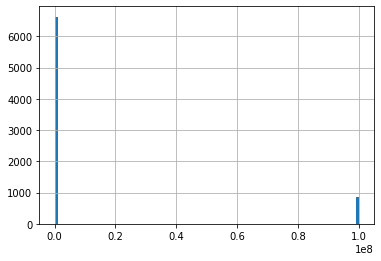

In [9]:
fig = train_data['Current Loan Amount'].hist(bins=100).get_figure()

Скорее всего значние 99999999 ошибочно. Укажем его как недостающие.

In [37]:
current_loan_amount_nan = train_data['Current Loan Amount'].replace(99999999, np.nan)

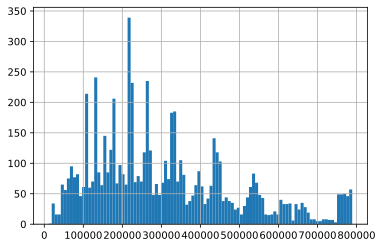

In [38]:
fig = current_loan_amount_nan.hist(bins=100).get_figure()

In [39]:
current_loan_amount_nan.describe()

count     6,630.000
mean    309,024.390
std     182,294.009
min      11,242.000
25%     172,744.000
50%     265,826.000
75%     430,100.000
max     789,030.000
Name: Current Loan Amount, dtype: float64

Ни с одним значением сильно не коррелирует.

In [57]:
train_data_prepared['Current Loan Amount'] = current_loan_amount_nan.fillna(current_loan_amount_nan.median())

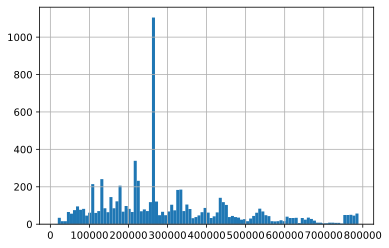

In [58]:
fig = train_data_prepared['Current Loan Amount'].hist(bins=100).get_figure()

# Current Credit Balance (Текущий кредитный баланс)

In [60]:
train_data['Current Credit Balance'].describe()

count       7,500.000
mean      289,833.235
std       317,871.382
min             0.000
25%       114,256.500
50%       209,323.000
75%       360,406.250
max     6,506,797.000
Name: Current Credit Balance, dtype: float64

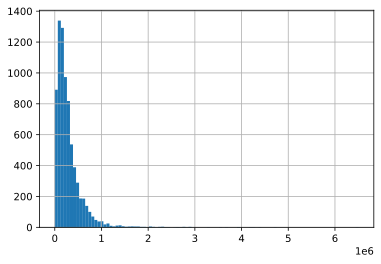

In [61]:
fig = train_data['Current Credit Balance'].hist(bins=100).get_figure()

# Monthly Debt - ежемесячный долг

In [62]:
train_data['Monthly Debt'].describe()

count     7,500.000
mean     18,314.454
std      11,926.765
min           0.000
25%      10,067.500
50%      16,076.500
75%      23,818.000
max     136,679.000
Name: Monthly Debt, dtype: float64

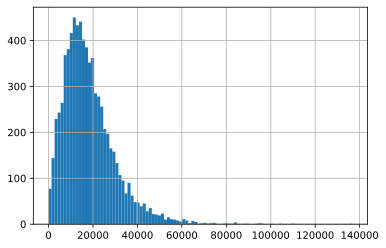

In [63]:
fig = train_data['Monthly Debt'].hist(bins=100).get_figure()

# Credit Score - кредитный рейтинг

In [64]:
train_data['Credit Score'].describe()

count   5,943.000
mean    1,151.087
std     1,604.451
min       585.000
25%       711.000
50%       731.000
75%       743.000
max     7,510.000
Name: Credit Score, dtype: float64

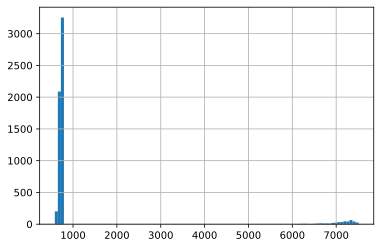

In [70]:
fig = train_data['Credit Score'].hist(bins=100).get_figure()

In [71]:
train_data['Credit Score'].value_counts()

740.000      169
747.000      168
748.000      157
745.000      152
742.000      151
            ... 
629.000        1
606.000        1
6,830.000      1
6,670.000      1
620.000        1
Name: Credit Score, Length: 268, dtype: int64

Скорее всего лишний ноль.

In [73]:
train_data_prepared['Credit Score'] = train_data['Credit Score'].apply(lambda x: x/10 if x>1000 else x)

In [74]:
train_data_prepared['Credit Score'].describe()

count   5,943.000
mean      720.087
std        27.957
min       585.000
25%       708.000
50%       729.000
75%       740.000
max       751.000
Name: Credit Score, dtype: float64

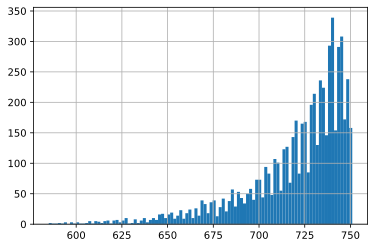

In [75]:
fig = train_data_prepared['Credit Score'].hist(bins=100).get_figure()

In [83]:
train_data_prepared['Credit Score'] = train_data_prepared['Credit Score'].fillna(train_data_prepared['Credit Score'].median())

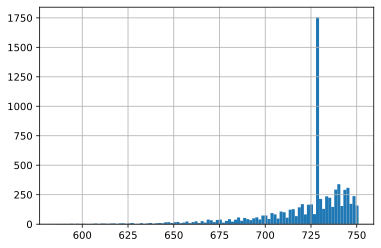

In [84]:
fig = train_data_prepared['Credit Score'].hist(bins=100).get_figure()

# Заметки

In [22]:
train_data['Purpose'].value_counts()

debt consolidation      5944
other                    665
home improvements        412
business loan            129
buy a car                 96
medical bills             71
major purchase            40
take a trip               37
buy house                 34
small business            26
wedding                   15
moving                    11
educational expenses      10
vacation                   8
renewable energy           2
Name: Purpose, dtype: int64

In [20]:
train_data.isna().sum(axis=0)

Home Ownership                     0
Annual Income                   1557
Years in current job             371
Tax Liens                          0
Number of Open Accounts            0
Years of Credit History            0
Maximum Open Credit                0
Number of Credit Problems          0
Months since last delinquent    4081
Bankruptcies                      14
Purpose                            0
Term                               0
Current Loan Amount                0
Current Credit Balance             0
Monthly Debt                       0
Credit Score                    1557
Credit Default                     0
dtype: int64

In [11]:
test_data = pd.read_csv('data/test.csv')
test_data

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score
0,Rent,NaN,4 years,0.000,9.000,12.500,"220,968.000",0.000,70.000,0.000,debt consolidation,Short Term,"162,470.000","105,906.000","6,813.000",NaN
1,Rent,"231,838.000",1 year,0.000,6.000,32.700,"55,946.000",0.000,8.000,0.000,educational expenses,Short Term,"78,298.000","46,037.000","2,318.000",699.000
2,Home Mortgage,"1,152,540.000",3 years,0.000,10.000,13.700,"204,600.000",0.000,NaN,0.000,debt consolidation,Short Term,"200,178.000","146,490.000","18,729.000","7,260.000"
3,Home Mortgage,"1,220,313.000",10+ years,0.000,16.000,17.000,"456,302.000",0.000,70.000,0.000,debt consolidation,Short Term,"217,382.000","213,199.000","27,559.000",739.000
4,Home Mortgage,"2,340,952.000",6 years,0.000,11.000,23.600,"1,207,272.000",0.000,NaN,0.000,debt consolidation,Long Term,"777,634.000","425,391.000","42,605.000",706.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,Home Mortgage,"1,020,053.000",10+ years,0.000,14.000,29.100,"559,152.000",1.000,68.000,1.000,debt consolidation,Short Term,"99,999,999.000","162,735.000","15,046.000",745.000
2496,Home Mortgage,NaN,2 years,0.000,15.000,17.000,"1,737,780.000",0.000,77.000,0.000,debt consolidation,Short Term,"468,512.000","1,439,269.000","32,996.000",NaN
2497,Home Mortgage,"1,171,806.000",2 years,0.000,48.000,12.800,"1,706,430.000",0.000,NaN,0.000,debt consolidation,Short Term,"430,496.000","676,438.000","36,912.000",695.000
2498,Rent,"723,520.000",10+ years,0.000,14.000,28.800,"945,780.000",0.000,NaN,0.000,debt consolidation,Short Term,"257,774.000","391,248.000","13,506.000",744.000


,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score
0,Rent,NaN,4 years,0.0,9.0,12.5,220968.0,0.0,70.0,0.0,debt consolidation,Short Term,162470.0,105906.0,6813.0,NaN
1,Rent,231838.0,1 year,0.0,6.0,32.7,55946.0,0.0,8.0,0.0,educational expenses,Short Term,78298.0,46037.0,2318.0,699.0
2,Home Mortgage,1152540.0,3 years,0.0,10.0,13.7,204600.0,0.0,NaN,0.0,debt consolidation,Short Term,200178.0,146490.0,18729.0,7260.0
3,Home Mortgage,1220313.0,10+ years,0.0,16.0,17.0,456302.0,0.0,70.0,0.0,debt consolidation,Short Term,217382.0,213199.0,27559.0,739.0
4,Home Mortgage,2340952.0,6 years,0.0,11.0,23.6,1207272.0,0.0,NaN,0.0,debt consolidation,Long Term,777634.0,425391.0,42605.0,706.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,Home Mortgage,1020053.0,10+ years,0.0,14.0,29.1,559152.0,1.0,68.0,1.0,debt consolidation,Short Term,99999999.0,162735.0,15046.0,745.0
2496,Home Mortgage,NaN,2 years,0.0,15.0,17.0,1737780.0,0.0,77.0,0.0,debt consolidation,Short Term,468512.0,1439269.0,32996.0,NaN
2497,Home Mortgage,1171806.0,2 years,0.0,48.0,12.8,1706430.0,0.0,NaN,0.0,debt consolidation,Short Term,430496.0,676438.0,36912.0,695.0
2498,Rent,723520.0,10+ years,0.0,14.0,28.8,945780.0,0.0,NaN,0.0,debt consolidation,Short Term,257774.0,391248.0,13506.0,744.0


In [18]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Home Ownership                2500 non-null   object 
 1   Annual Income                 1987 non-null   float64
 2   Years in current job          2414 non-null   object 
 3   Tax Liens                     2500 non-null   float64
 4   Number of Open Accounts       2500 non-null   float64
 5   Years of Credit History       2500 non-null   float64
 6   Maximum Open Credit           2500 non-null   float64
 7   Number of Credit Problems     2500 non-null   float64
 8   Months since last delinquent  1142 non-null   float64
 9   Bankruptcies                  2497 non-null   float64
 10  Purpose                       2500 non-null   object 
 11  Term                          2500 non-null   object 
 12  Current Loan Amount           2500 non-null   float64
 13  Cur

Борьба с выбросами. стандартизация. Oversampling попробовать. Добавить тестовае данные для анализа параметров.